In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

In [3]:
path = r'C:\Users\acer\Downloads\train.csv'
dataset=pd.read_csv(path)

In [4]:
dataset.head() #getting first few rows 

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [5]:
dataset.shape  #checking rows and columns

(14999, 9)

In [6]:
#converting categorical features to numbers
#mapping it using a dictionary
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
dataset["category"]=dataset["category"].map(category)


In [7]:
dataset.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [8]:
 #data clean using pandas slicing
#removing character F as they do not add value
dataset=dataset[dataset.views!='F']
dataset=dataset[dataset.comment!='F']
dataset=dataset[dataset.likes!='F']
dataset=dataset[dataset.dislikes!='F']

In [9]:
#convert values to integers for views,likes,dislikes,comments and adview
dataset['views']=pd.to_numeric(dataset['views'])
dataset['likes']=pd.to_numeric(dataset['likes'])
dataset['comment']=pd.to_numeric(dataset['comment'])
dataset['dislikes']=pd.to_numeric(dataset['dislikes'])
dataset['adview']=pd.to_numeric(dataset['adview'])

In [10]:
#storing video id in some column for accesing it later
column_vidid=dataset['vidid']

In [11]:
#encoding fatures like duration,published,vidid with the help of labelencoder
from sklearn.preprocessing import LabelEncoder
dataset['duration']=LabelEncoder().fit_transform(dataset['duration'])
dataset['vidid']=LabelEncoder().fit_transform(dataset['vidid'])
dataset['published']=LabelEncoder().fit_transform(dataset['published'])

In [12]:
#now we have converted all the data into numeric form
dataset.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [13]:
#part of data cleaning and data transformation  
#converting duration in actual seconds
import datetime
import time

In [14]:
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv(path)["duration"]
time = mp.apply(checki)
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
dataset["duration"]=time1
dataset.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


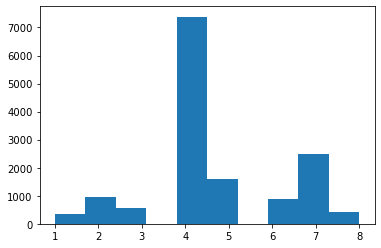

In [15]:
#visualization
plt.hist(dataset['category'])
plt.show()


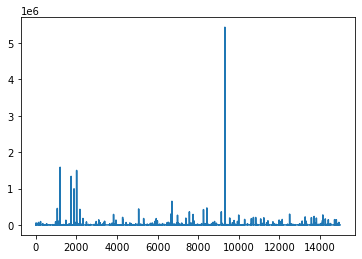

In [16]:
 plt.plot(dataset['adview'])
plt.show()

In [17]:
#remove adviews which are far greater in no. as it is unusual.which doesn't help the data to train model very well.
#data slicing ,remove videos with adview greater than 2000000 as outlier
dataset=dataset[dataset['adview']<2000000]

<ipython-input-18-a6584d6a4e4f>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True,ax=ax,annot=True)


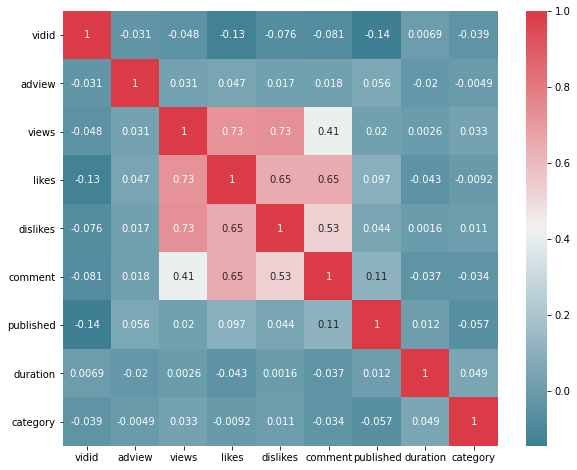

In [18]:
import matplotlib.cm as cm
#heatmap , plotting correlation graph
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr=dataset.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True,ax=ax,annot=True)
plt.show()
#red is highly correlated and blue is lowly correlated

In [19]:
#dropping adview and vidid features from dataset
#spilt data in training data , test data
Y_train=pd.DataFrame(data = dataset.iloc[:, 1].values, columns=['target'])
dataset=dataset.drop(["adview"],axis=1)
dataset=dataset.drop(["vidid"],axis=1)

In [20]:
dataset.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [21]:
#spliting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,Y_train,test_size=0.2,random_state=42) #here is 20:80 split , converted to pandas array.
X_train.shape #size of that matrix

(11708, 7)

In [22]:
X_train

,views,likes,dislikes,comment,published,duration,category
13440,86739,117,9,4,1217,180,4
9523,1419766,887,362,232,1547,5811,7
3012,26086,19,0,9,966,178,6
1888,305445,3662,45,555,1484,257,7
11378,737649,1702,96,53,1127,895,4
...,...,...,...,...,...,...,...
5316,31648,140,24,14,1925,231,7
13748,1804,4,1,0,1049,232,4
5522,204817,86,35,11,1237,218,4
883,1361366,1384,757,185,2145,240,7


In [23]:
#now we describe the x_train to get an overview
X_train.describe()

,views,likes,dislikes,comment,published,duration,category
count,1.170800e+04,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000
mean,6.974161e+05,2771.122139,251.030577,418.178767,1551.810215,1048.108985,4.611548
std,2.582877e+06,8734.608422,965.881840,1556.703705,579.565587,2379.930309,1.579242
min,4.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.133975e+04,86.000000,7.000000,7.000000,1144.000000,188.000000,4.000000
50%,1.609395e+05,461.000000,39.000000,46.000000,1704.000000,327.000000,4.000000
75%,5.842132e+05,1897.000000,170.000000,232.000000,2065.000000,726.000000,6.000000
max,1.380479e+08,283824.000000,49449.000000,75045.000000,2383.000000,42317.000000,8.000000


In [24]:
"""
we normalize the data for every feature should be fair that one feature is not overcomed by other 
normalizing data(converting them to numpy for normalizing from pandas array)
"""
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()    #taking max and min values and normalizing it
X_train=scalar.fit_transform(X_train)   #converting them to numpy form pandas
X_test=scalar.fit_transform(X_test)
X_train.mean()   #finding mean


0.1739096800320488

In [25]:
X_train    #converted to numpy

array([[6.27970800e-04, 4.12227296e-04, 1.82005703e-04, ...,
        5.10700797e-01, 4.25360966e-03, 4.28571429e-01],
       [1.02842406e-02, 3.12517617e-03, 7.32067383e-03, ...,
        6.49181704e-01, 1.37320699e-01, 8.57142857e-01],
       [1.88608556e-04, 6.69428942e-05, 0.00000000e+00, ...,
        4.05371381e-01, 4.20634733e-03, 7.14285714e-01],
       ...,
       [1.48331209e-03, 3.03004679e-04, 7.07799956e-04, ...,
        5.19093580e-01, 5.15159392e-03, 4.28571429e-01],
       [9.86119882e-03, 4.87626135e-03, 1.53087019e-02, ...,
        9.00125892e-01, 5.67147955e-03, 8.57142857e-01],
       [2.87646701e-04, 4.29843847e-04, 1.21337135e-04, ...,
        9.39991607e-02, 8.36543233e-03, 4.28571429e-01]])

In [26]:
#Evaluation Metrics
from sklearn import metrics
def print_error(X_test,y_test,model_name):            #we have to check errors of upcoming models to choose the suitable one.
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,prediction))
  print('Mean Squared Error:',metrics.mean_squared_error(y_test,prediction))
  print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

In [27]:
#here now on we will see that we use sklearn mostly
#linear regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()   #now the model is blank
linear_regression.fit(X_train,y_train)           #now we added data
print_error(X_test,y_test,linear_regression)

Mean Absolute Error: 3707.3780058245316
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [28]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
print_error(X_test,y_test,decision_tree)  

Mean Absolute Error: 2600.010587431694
Mean Squared Error: 881356960.0133197
Root Mean Squared Error: 29687.656694547648


In [29]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators=200   #assumed parameters (hyperparameters)
max_depth=25
min_samples_split=15
min_samples_leaf=2
random_forest=RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split)
random_forest.fit(X_train, y_train)
print_error(X_test,y_test,random_forest)

<ipython-input-29-38151ab36043>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Mean Absolute Error: 3189.0480292462107
Mean Squared Error: 591987032.1814764
Root Mean Squared Error: 24330.783632704402


In [30]:
#support Vector Regressor
from sklearn.svm import SVR
supportvector_regresor=SVR()
supportvector_regresor.fit(X_train,y_train)
print_error(X_test,y_test,linear_regression)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error: 3707.3780058245316
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [31]:
#Saving Scikitlearn Models
#choosing the best regressor with the help of 'pkl'
import joblib
joblib.dump(decision_tree,"decisiontree_youtubeadview.pkl") #it's very low error than others


['decisiontree_youtubeadview.pkl']

#Artificial neural network
import keras
from keras.layers import Dense  #dense layer 

ann=keras.models.Sequential([
                             Dense(6,activation='relu',input_shape=X_train.shape[1:]),
                             Dense(6,activation='relu'),
                             Dense(1)
                             ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)

ann.summary()  #showing summary

print_error(X_test,y_test,ann)

#saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

# Testing

In [33]:
# Import the Libraries
import numpy as np
import pandas as pd

path1=r'C:\Users\acer\Downloads\test.csv'
data = pd.read_csv(path1)

data.head(10)

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
5,VID_10315,145820,215,29,19,2014-01-23,PT39M18S,D
6,VID_7417,12921,169,3,73,2014-05-01,PT10M4S,D
7,VID_17788,4502,65,2,8,2016-07-13,PT2M35S,F
8,VID_14591,662956,1841,321,219,2014-01-13,PT13M57S,D
9,VID_1228,552009,6732,97,1100,2016-08-25,PT17M49S,B


In [34]:
# Checking the datatype of dataset, datatype of each attribute and null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      8764 non-null   object
 1   views      8764 non-null   object
 2   likes      8764 non-null   object
 3   dislikes   8764 non-null   object
 4   comment    8764 non-null   object
 5   published  8764 non-null   object
 6   duration   8764 non-null   object
 7   category   8764 non-null   object
dtypes: object(8)
memory usage: 547.9+ KB


In [35]:
# Removing character "F" present in test set
data=data[data.views!='F']
data=data[data.likes!='F']
data=data[data.dislikes!='F']
data=data[data.comment!='F']

data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [36]:
# Assigning each category a number for Category feature

category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data["category"]=data["category"].map(category)

data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [37]:
# Convert values to integers for views, likes, comments, dislikes and adview

data["views"] = pd.to_numeric(data["views"])
data["comment"] = pd.to_numeric(data["comment"])
data["likes"] = pd.to_numeric(data["likes"])
data["dislikes"] = pd.to_numeric(data["dislikes"])

column_vidid=data['vidid']

In [38]:
# Endoding features like Category, Duration, vidid
from sklearn.preprocessing import LabelEncoder
data['duration']=LabelEncoder().fit_transform(data['duration'])
data['vidid']=LabelEncoder().fit_transform(data['vidid'])
data['published']=LabelEncoder().fit_transform(data['published'])


data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [39]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
test=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)
data["duration"]=time1


data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [40]:
#Dropping unnecessary column vidid 
data=data.drop(["vidid"],axis=1)
data.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [41]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=scaler.fit_transform(data)
data.mean()

0.16965883079102045

In [43]:
#loading saved model 
import joblib 
model = joblib.load("decisiontree_youtubeadview.pkl")#your model name

In [44]:
#predicting values
result=model.predict(data)
result#array of adview prediction

array([ 4., 14.,  1., ..., 13.,  2.,  6.])

In [45]:
#loading csv again without pre-processing
new_data = pd.read_csv("test.csv")
# Removing character "F" present for new data set as we haven't predicted these values
new_data=new_data[new_data.views!='F']
new_data=new_data[new_data.likes!='F']
new_data=new_data[new_data.dislikes!='F']
new_data=new_data[new_data.comment!='F']

In [46]:
#adding result to new csv file
new_data['adview']=result
new_data.head(10)

,vidid,views,likes,dislikes,comment,published,duration,category,adview
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B,4.0
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F,14.0
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D,1.0
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G,9.0
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B,1.0
5,VID_10315,145820,215,29,19,2014-01-23,PT39M18S,D,1.0
6,VID_7417,12921,169,3,73,2014-05-01,PT10M4S,D,2.0
7,VID_17788,4502,65,2,8,2016-07-13,PT2M35S,F,4.0
8,VID_14591,662956,1841,321,219,2014-01-13,PT13M57S,D,1.0
9,VID_1228,552009,6732,97,1100,2016-08-25,PT17M49S,B,2.0


In [47]:
new_data.to_csv("Prediction_Submission.csv")